In [1]:
import pandas as pd

In [2]:
# The class ids are numbered 1-4 where 1 represents World, 2 represents Sports, 
# 3 represents Business and 4 represents Sci/Tech.
df = pd.read_csv("test.csv")
df.head(5)

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [3]:
df.shape

(7600, 3)

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(7600, 3)

In [6]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [7]:
df["final_text"] = df["Title"] + " " + df["Description"]
df.head()

,Class Index,Title,Description,final_text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Fears for T N pension after talks Unions repre...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",The Race is On: Second Private Team Sets Launc...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Ky. Company Wins Grant to Study Peptides (AP) ...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Prediction Unit Helps Forecast Wildfires (AP) ...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Calif. Aims to Limit Farm-Related Smog (AP) AP...


In [8]:
new_df = df.drop(['Title', 'Description'], axis=1)

In [9]:
new_df

,Class Index,final_text
0,3,Fears for T N pension after talks Unions repre...
1,4,The Race is On: Second Private Team Sets Launc...
2,4,Ky. Company Wins Grant to Study Peptides (AP) ...
3,4,Prediction Unit Helps Forecast Wildfires (AP) ...
4,4,Calif. Aims to Limit Farm-Related Smog (AP) AP...
...,...,...
7595,1,Around the world Ukrainian presidential candid...
7596,2,Void is filled with Clement With the supply of...
7597,2,Martinez leaves bitter Like Roger Clemens did ...
7598,3,5 of arthritis patients in Singapore take Bext...


# Preprocessing

In [10]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')


def preprocess_text(text):
     # Lowercasing
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+',' ',text)
    
    # Remove punctuation and numbers
    text = re.sub('[^a-zA-Z]',' ',text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing Punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Removing Stop Words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
new_df["preprocessed_text"] = new_df["final_text"].apply(preprocess_text)

In [12]:
new_df.head()

,Class Index,final_text,preprocessed_text
0,3,Fears for T N pension after talks Unions repre...,fear n pension talk union repres worker turner...
1,4,The Race is On: Second Private Team Sets Launc...,race second privat team set launch date human ...
2,4,Ky. Company Wins Grant to Study Peptides (AP) ...,ky compani win grant studi peptid ap ap compan...
3,4,Prediction Unit Helps Forecast Wildfires (AP) ...,predict unit help forecast wildfir ap ap bare ...
4,4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,calif aim limit farm relat smog ap ap southern...


In [13]:
#convert dataframe to values
data_process = new_df['preprocessed_text'].values
label = new_df['Class Index'].apply(lambda x:x-1).values

In [14]:
# view data array
data_process[0:10]

array(['fear n pension talk union repres worker turner newal say disappoint talk stricken parent firm feder mogul',
       'race second privat team set launch date human spaceflight space com space com toronto canada second team rocket compet million ansari x prize contest privat fund suborbit space flight offici announc first launch date man rocket',
       'ky compani win grant studi peptid ap ap compani found chemistri research univers louisvil grant develop method produc better peptid short chain amino acid build block protein',
       'predict unit help forecast wildfir ap ap bare dawn mike fitzpatrick start shift blur color map figur endless chart alreadi know day bring lightn strike place expect wind pick moist place dri flame roar',
       'calif aim limit farm relat smog ap ap southern california smog fight agenc went emiss bovin varieti friday adopt nation first rule reduc air pollut dairi cow manur',
       'open letter british copyright indoctrin school british depart educ 

In [15]:
# view label array
label

array([2, 3, 3, ..., 1, 2, 2], dtype=int64)

In [19]:
# split data into training and validation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_process, label, test_size=0.2, shuffle=True,  stratify=label, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6080,), (1520,), (6080,), (1520,))

In [20]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)

word_index = tokenizer.word_index
total_words = len(word_index)+1
 
sekuens_train = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)
 
padded_train = pad_sequences(sekuens_train, maxlen=100) 
padded_test = pad_sequences(sekuens_test, maxlen=100)

In [21]:
print(f'train datashape : {padded_train.shape}')
print(f'test datashape : {padded_test.shape}')
total_words

train datashape : (6080, 100)
test datashape : (1520, 100)


14566

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [24]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words,output_dim=128,input_length=100),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          1864448   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                

In [26]:
# model fit
from keras.callbacks import EarlyStopping
history = model.fit(padded_train, label_train, 
                    batch_size=256, 
                    epochs=30, 
                    validation_data=(padded_test, label_test),
                    verbose=2, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)],
                    validation_steps=5, steps_per_epoch=25)


Epoch 1/30
25/25 - 13s - loss: 1.3117 - accuracy: 0.4580 - val_loss: 0.9634 - val_accuracy: 0.7008 - 13s/epoch - 501ms/step
Epoch 2/30
25/25 - 9s - loss: 0.6686 - accuracy: 0.7042 - val_loss: 0.5534 - val_accuracy: 0.7977 - 9s/epoch - 365ms/step
Epoch 3/30
25/25 - 9s - loss: 0.3288 - accuracy: 0.8771 - val_loss: 0.4467 - val_accuracy: 0.8641 - 9s/epoch - 362ms/step
Epoch 4/30
25/25 - 9s - loss: 0.1744 - accuracy: 0.9473 - val_loss: 0.5305 - val_accuracy: 0.8500 - 9s/epoch - 360ms/step
Epoch 5/30
25/25 - 9s - loss: 0.1059 - accuracy: 0.9684 - val_loss: 0.5959 - val_accuracy: 0.8477 - 9s/epoch - 342ms/step
Epoch 6/30
25/25 - 9s - loss: 0.0654 - accuracy: 0.9833 - val_loss: 0.7123 - val_accuracy: 0.8383 - 9s/epoch - 344ms/step


In [32]:
# define function plot visualization training and validation process
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy
    plt.figure(figsize=(15, 5))

    # create visualizations for accuracy values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()

Training Accuracy: 0.98
Training Loss: 0.07
Validation Accuracy: 0.84
Validation Loss: 0.71




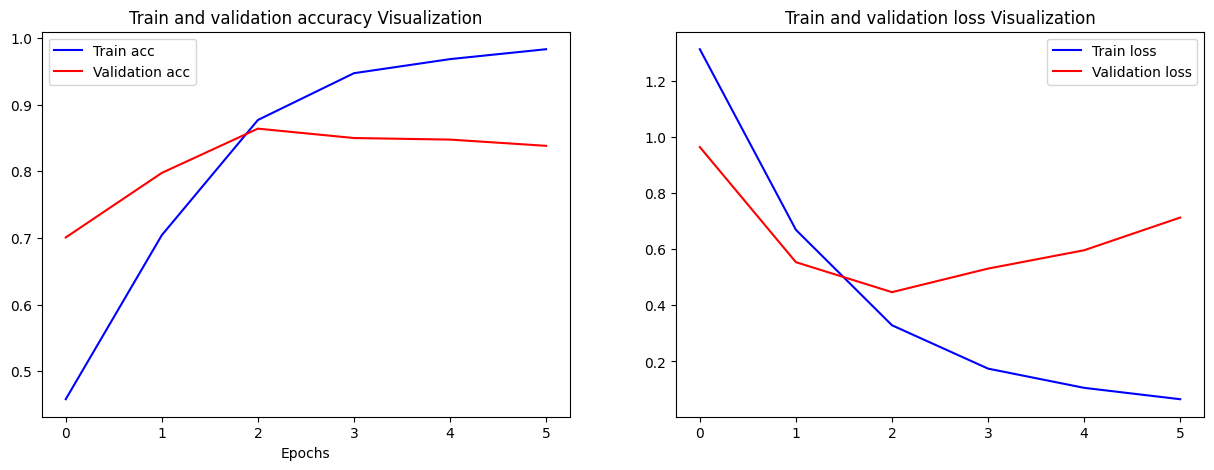

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_history(history)

In [58]:
score = model.evaluate(padded_test,y_test,verbose=1)

48/48 [==============================] - 1s 25ms/step - loss: 0.6973 - accuracy: 0.8388


In [59]:
score

[0.6973017454147339, 0.8388158082962036]

In [60]:
print("Testing Accuracy: ",score[1]*100)

Testing Accuracy:  83.88158082962036


In [34]:
text_data = "Scientists Discover Breakthrough Method for Efficiently Storing Renewable Energy Tech Giant Unveils Cutting-Edge Quantum Computing Solution for Complex Problems"

In [50]:
import numpy as np
new_complaint = ['Cricket Australia is set to begin the team’s pre-season later this month under a set of new training protocols devised for the safety of players amid the COVID-19 pandemic.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=100)
pred = model.predict(padded)
labels = ['World','Sports','Business','Sci/Tech']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 36ms/step
[[2.4388650e-05 9.8927617e-01 4.7435551e-06 1.0694636e-02]] Sports


In [55]:
import numpy as np
new_complaint_1 = ['Scientists Discover Breakthrough Method for Efficiently Storing Renewable Energy Tech Giant Unveils Cutting-Edge Quantum Computing Solution for Complex Problems']
seq = tokenizer.texts_to_sequences(new_complaint_1)
padded = pad_sequences(seq, maxlen=100)
pred = model.predict(padded)
labels = ['World','Sports','Business','Sci/Tech']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 35ms/step
[[7.1934974e-06 2.0902514e-01 3.0209743e-05 7.9093742e-01]] Sci/Tech
